Achmad Nurnaafi

1306621057

Kapita Selekta Fisika Komputasi

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

# Reduksi Dimensi dengan PCA

In [2]:
gradmax_data = pd.read_csv("gradmax.csv")
fftmax_data = pd.read_csv("fftmax.csv")

gradmax_features = gradmax_data.drop("Zat", axis=1)
fftmax_features = fftmax_data.drop("Zat", axis=1)

## Normalisasi Data

In [3]:
scaler_gradmax = StandardScaler()
gradmax_features_normalized = scaler_gradmax.fit_transform(gradmax_features)

scaler_fftmax = StandardScaler()
fftmax_features_normalized = scaler_fftmax.fit_transform(fftmax_features)

In [4]:
gradmax_normalized_df = pd.DataFrame(gradmax_features_normalized, columns=gradmax_features.columns)
fftmax_normalized_df = pd.DataFrame(fftmax_features_normalized, columns=fftmax_features.columns)

In [5]:
gradmax_normalized_df

,gradmaxF1,gradmaxF2,gradmaxF3,gradmaxF4,gradmaxF5,gradmaxF6,gradmaxF7,gradmaxF8,gradmaxF9,gradmaxF10
0,0.387912,0.167864,-0.431788,0.536244,0.578010,0.608109,1.003693,0.482610,0.865804,0.534745
1,1.967171,1.908674,2.315953,1.958300,2.298804,2.262353,1.003693,1.928153,1.975602,1.514895
2,-1.120634,-1.137744,-0.431788,-1.015878,-0.980999,-0.976237,-1.125353,-1.148003,-0.855324,-1.028685
3,-0.484216,-0.702541,-0.431788,-0.183455,-0.245618,-0.253961,-0.060830,-0.262670,0.019348,-0.258997
4,0.812190,0.603066,-0.431788,0.995811,1.004532,1.213889,-0.060830,0.877758,1.006880,0.606903
...,...,...,...,...,...,...,...,...,...,...
65,0.270057,0.167864,-0.431788,0.128704,0.239735,0.142125,1.003693,0.227514,0.320310,0.739193
66,1.189327,1.038269,-0.431788,1.307970,1.195731,1.097393,-0.060830,1.212884,1.571184,1.707317
67,0.930046,1.038269,-0.431788,0.683652,0.960409,0.817802,1.003693,0.812734,0.846994,1.087958
68,1.165756,1.255870,2.315953,1.446707,1.195731,1.283787,3.132740,1.172869,1.392488,1.484829


In [6]:
gradmax_normalized_df.describe()

,gradmaxF1,gradmaxF2,gradmaxF3,gradmaxF4,gradmaxF5,gradmaxF6,gradmaxF7,gradmaxF8,gradmaxF9,gradmaxF10
count,7.000000e+01,7.000000e+01,7.000000e+01,7.000000e+01,7.000000e+01,7.000000e+01,7.000000e+01,7.000000e+01,7.000000e+01,7.000000e+01
mean,-3.346529e-16,1.839798e-16,3.267228e-16,4.758099e-17,3.013462e-16,1.062642e-16,2.464299e-16,-1.903239e-17,1.839798e-16,-6.661338e-17
std,1.007220e+00,1.007220e+00,1.007220e+00,1.007220e+00,1.007220e+00,1.007220e+00,1.007220e+00,1.007220e+00,1.007220e+00,1.007220e+00
min,-1.662768e+00,-1.355345e+00,-4.317878e-01,-1.692222e+00,-1.584013e+00,-1.605316e+00,-2.189877e+00,-1.743226e+00,-1.824046e+00,-1.804387e+00
25%,-8.731384e-01,-7.025413e-01,-4.317878e-01,-8.836445e-01,-8.743691e-01,-8.946897e-01,-1.125353e+00,-8.266318e-01,-8.435676e-01,-8.332565e-01
50%,-1.777929e-01,-2.673387e-01,-4.317878e-01,-6.639566e-02,-2.088485e-01,-2.190126e-01,-6.082991e-02,-1.201165e-01,-1.076209e-01,-6.958121e-02
75%,8.062977e-01,7.662673e-01,-4.317878e-01,6.728135e-01,7.508250e-01,6.081094e-01,1.003693e+00,7.564626e-01,7.882121e-01,7.797821e-01
max,2.179310e+00,2.779079e+00,2.315953e+00,2.183748e+00,2.298804e+00,2.262353e+00,3.132740e+00,2.033192e+00,2.116678e+00,2.194385e+00


In [7]:
fftmax_normalized_df

,fouriermF1,fouriermF2,fouriermF3,fouriermF4,fouriermF5,fouriermF6,fouriermF7,fouriermF8,fouriermF9,fouriermF10
0,0.343297,0.124359,-0.982716,0.433405,0.264325,0.381548,0.280734,0.124695,0.999707,0.604248
1,1.527419,1.793330,0.221891,1.539272,1.493246,1.617910,1.513556,1.238115,1.677727,1.559592
2,-1.319378,-1.090177,-0.887447,-0.963762,-1.032883,-0.971008,-0.863213,-1.550595,-0.568705,-1.188689
3,-0.427250,-0.603330,-1.053508,-0.096834,-0.410503,-0.408593,-0.518514,-0.161162,0.408430,-0.116383
4,0.817911,0.698490,0.010395,0.670992,0.886164,0.897447,0.543155,0.315164,0.860941,0.449597
...,...,...,...,...,...,...,...,...,...,...
65,0.417191,0.187358,-0.185852,0.342865,0.373292,0.125391,-0.640528,0.531770,0.559446,0.657541
66,1.208047,1.276958,0.735528,1.240795,1.260348,1.038159,-0.634337,1.220646,1.264301,1.330242
67,0.973054,1.031624,0.121890,0.629008,1.084467,0.945171,-0.503849,0.626313,0.763973,0.818980
68,1.223227,1.413783,0.644333,1.331180,1.479373,1.444735,1.403928,1.111493,1.114703,1.348626


In [8]:
fftmax_normalized_df.describe()

,fouriermF1,fouriermF2,fouriermF3,fouriermF4,fouriermF5,fouriermF6,fouriermF7,fouriermF8,fouriermF9,fouriermF10
count,7.000000e+01,7.000000e+01,7.000000e+01,7.000000e+01,7.000000e+01,7.000000e+01,7.000000e+01,7.000000e+01,7.000000e+01,7.000000e+01
mean,1.278343e-15,2.791418e-16,-1.340198e-16,7.137148e-17,-6.264830e-16,-6.407573e-16,-1.443290e-16,1.141944e-16,4.805680e-16,-1.030921e-16
std,1.007220e+00,1.007220e+00,1.007220e+00,1.007220e+00,1.007220e+00,1.007220e+00,1.007220e+00,1.007220e+00,1.007220e+00,1.007220e+00
min,-2.039754e+00,-1.410481e+00,-1.284289e+00,-2.457475e+00,-1.790920e+00,-1.758760e+00,-2.385088e+00,-2.406478e+00,-3.304475e+00,-2.186869e+00
25%,-8.679960e-01,-8.239485e-01,-7.746409e-01,-8.257560e-01,-8.349880e-01,-8.603324e-01,-6.703504e-01,-7.656399e-01,-7.911376e-01,-7.219852e-01
50%,-6.503467e-02,-2.822639e-01,-7.743562e-02,5.111966e-02,-2.163543e-01,-1.831002e-01,-1.839722e-01,1.825686e-01,1.758861e-01,9.666579e-02
75%,8.851984e-01,7.681864e-01,5.350530e-01,7.003145e-01,7.434412e-01,7.683242e-01,6.102139e-01,7.337539e-01,7.907218e-01,7.631221e-01
max,1.894744e+00,2.554247e+00,4.658466e+00,1.944455e+00,2.489690e+00,2.486500e+00,2.916294e+00,1.656512e+00,1.677727e+00,1.711796e+00


## PCA

### PCA gradmax

**Nilai Eigen dan Vektor Eigen**

In [9]:
pca_gradmax = PCA(n_components=3)
pca_result_gradmax = pca_gradmax.fit_transform(gradmax_features_normalized)

In [10]:
pca_gradmax.explained_variance_ #nilai eigen

array([8.58264725, 0.87439324, 0.4601015 ])

In [11]:
pca_gradmax.explained_variance_ratio_

array([0.8460038 , 0.08619019, 0.04535286])

hasil diatas menunjukkan 84.60% variansi data kita dapat jelaskan oleh komponen 1, 8.61% oleh komponen 2, dan 4.53% oleh komponen 3.

In [12]:
pca_gradmax.components_ #vektor eigen

array([[ 0.34155398,  0.33331509,  0.16167336,  0.3363569 ,  0.33869856,
         0.33930495,  0.25892263,  0.34123   ,  0.32876575,  0.33400205],
       [-0.06161292,  0.02982397,  0.92191603, -0.15278658, -0.02956792,
        -0.04661736,  0.2583958 , -0.08965034, -0.17112873, -0.1220796 ],
       [-0.02367519, -0.03596065, -0.30873894, -0.08544556, -0.11767551,
        -0.10891598,  0.90682012, -0.07863791, -0.18472862,  0.08475911]])

In [13]:
pca_columns_gradmax = ['PC1', 'PC2', 'PC3']
pca_df_gradmax = pd.DataFrame(data=pca_result_gradmax, columns=pca_columns_gradmax)

pca_df_gradmax['Zat'] = fftmax_data['Zat'].values
pca_df_gradmax

,PC1,PC2,PC3,Zat
0,1.588923,-0.541697,0.695623,A
1,5.960741,1.161668,-0.992488,A
2,-3.144892,-0.049146,-0.350079,A
3,-0.885955,-0.305922,0.182244,A
4,2.313171,-1.009370,-0.501860,A
...,...,...,...,...
65,0.940806,-0.349184,0.961953,B
66,3.384690,-1.328495,-0.600249,B
67,2.605698,-0.686658,0.595459,B
68,4.683488,2.069281,1.425286,B


In [14]:
pca_df_gradmax.describe()

,PC1,PC2,PC3
count,7.000000e+01,7.000000e+01,7.000000e+01
mean,9.516197e-17,-3.330669e-17,-4.520194e-17
std,2.929616e+00,9.350900e-01,6.783078e-01
min,-4.741871e+00,-1.658447e+00,-1.614866e+00
25%,-2.298484e+00,-5.180430e-01,-3.854590e-01
50%,-5.235987e-01,-1.305734e-01,-6.565225e-02
75%,2.154785e+00,1.184378e-01,4.803394e-01
max,5.963753e+00,2.846630e+00,1.741503e+00


Scree Plot

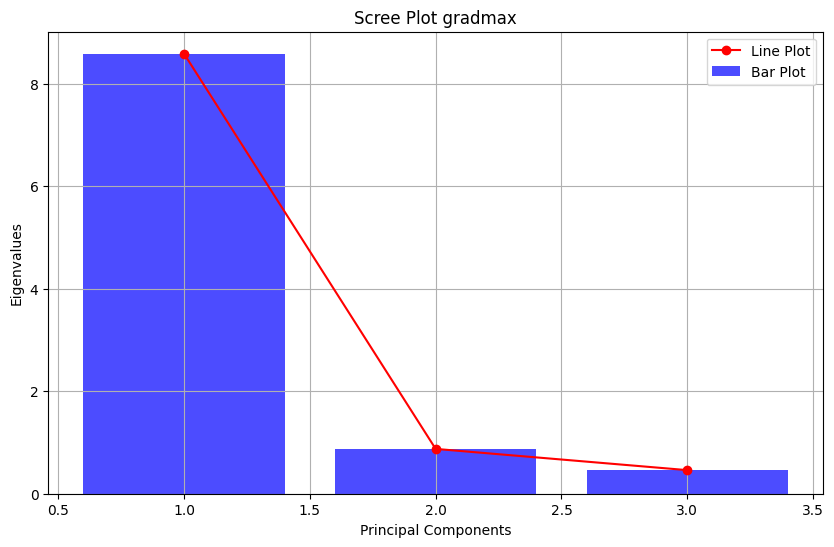

In [15]:
plt.figure(figsize=(10, 6))

plt.bar(range(1, len(pca_gradmax.explained_variance_) + 1), pca_gradmax.explained_variance_, color='blue', alpha=0.7, label='Bar Plot')
plt.plot(range(1, len(pca_gradmax.explained_variance_) + 1), pca_gradmax.explained_variance_, marker='o', color='red', label='Line Plot')

plt.xlabel('Principal Components')
plt.ylabel('Eigenvalues')
plt.title('Scree Plot gradmax')
plt.legend()
plt.grid(True)
plt.show()

**Biplot**

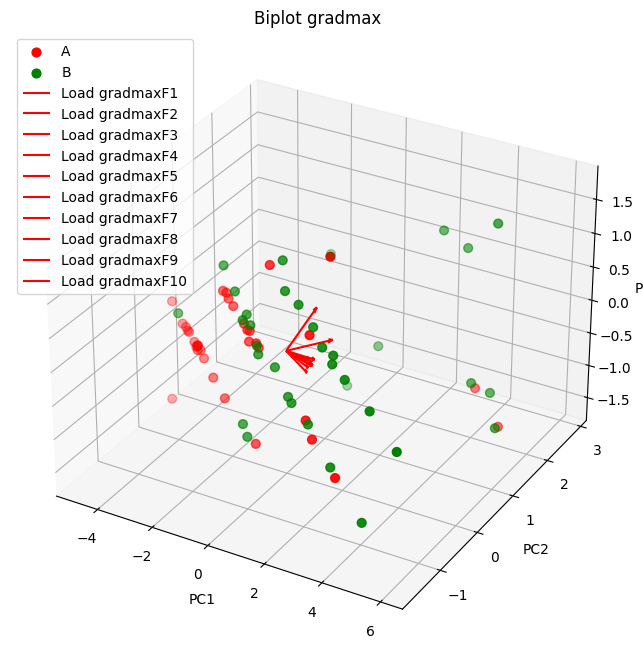

In [16]:
# Mendapatkan loading plot
loading_scores = pca_gradmax.components_[:3, :].T * np.sqrt(pca_gradmax.explained_variance_[:3])

# Mendapatkan score plot
score_plot_df = pd.DataFrame(data=pca_result_gradmax[:, :3], columns=['Principal Component 1', 'Principal Component 2', 'Principal Component 3'])
score_plot_df['Zat'] = gradmax_data['Zat']

# Plot biplot menggunakan Matplotlib
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot score plot
for zat, color in zip(score_plot_df['Zat'].unique(), ['r', 'g', 'b']):
    indices = score_plot_df['Zat'] == zat
    ax.scatter(score_plot_df.loc[indices, 'Principal Component 1'],
               score_plot_df.loc[indices, 'Principal Component 2'],
               score_plot_df.loc[indices, 'Principal Component 3'],
               c=color, s=40, label=zat)

# Tambahkan loading plot
for i, feature in enumerate(gradmax_features.columns):
    ax.quiver(0, 0, 0, loading_scores[i, 0], loading_scores[i, 1], loading_scores[i, 2],
              color='red', arrow_length_ratio=0.1, label=f'Load {feature}')

# Atur label sumbu
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Biplot gradmax')

# Tampilkan legenda
ax.legend()

plt.show()


### PCA fftmax

**Nilai Eigen dan Vektor Eigen**

In [17]:
pca_fftmax = PCA(n_components=3)
pca_result_fftmax = pca_fftmax.fit_transform(fftmax_features_normalized)

In [18]:
pca_fftmax.explained_variance_ #nilai eigen

array([8.37312822, 1.20945456, 0.26156815])

In [19]:
pca_fftmax.explained_variance_ratio_

array([0.82535121, 0.11921766, 0.02578315])

hasil diatas menunjukkan 82.53% variansi data kita dapat jelaskan oleh komponen 1, 11.92% oleh komponen 2, dan 2.57% oleh komponen 3.

In [20]:
pca_fftmax.components_ #vektor eigen

array([[ 0.3438943 ,  0.33903333,  0.2076446 ,  0.33123422,  0.34251268,
         0.34245378,  0.27814315,  0.322528  ,  0.28889324,  0.33841391],
       [-0.00150123,  0.08089673,  0.65643255, -0.25326163,  0.06977369,
         0.10574137,  0.42572393, -0.29360717, -0.45381046, -0.09470348],
       [ 0.10718177,  0.04494144, -0.70211203, -0.14391977,  0.05053951,
         0.12850866,  0.57473821, -0.10485956, -0.30971231,  0.12848414]])

In [21]:
pca_columns_fftmax = ['PC1', 'PC2','PC3']
pca_df_fftmax = pd.DataFrame(data=pca_result_fftmax, columns=pca_columns_fftmax)

pca_df_fftmax['Zat'] = fftmax_data['Zat'].values
pca_df_fftmax

,PC1,PC2,PC3,Zat
0,0.932516,-1.114516,0.648664,A
1,4.587502,-0.454362,0.571207,A
2,-3.319910,-0.140987,0.084281,A
3,-1.000427,-1.134800,0.184895,A
4,2.006951,-0.245690,0.245551,A
...,...,...,...,...
65,0.830259,-0.899972,-0.343422,B
66,3.231977,-0.860392,-1.024248,B
67,2.172884,-0.644336,-0.335822,B
68,4.003568,0.092108,0.329476,B


In [22]:
pca_df_fftmax.describe()

,PC1,PC2,PC3
count,7.000000e+01,7.000000e+01,7.000000e+01
mean,-6.344132e-18,-8.247371e-17,-1.586033e-17
std,2.893636e+00,1.099752e+00,5.114373e-01
min,-5.379648e+00,-1.643952e+00,-1.119633e+00
25%,-2.411587e+00,-7.022615e-01,-3.216468e-01
50%,-2.548509e-01,-1.961034e-01,8.799206e-02
75%,2.160992e+00,2.261153e-01,2.701302e-01
max,6.212635e+00,5.236713e+00,1.506587e+00


**Scree Plot**

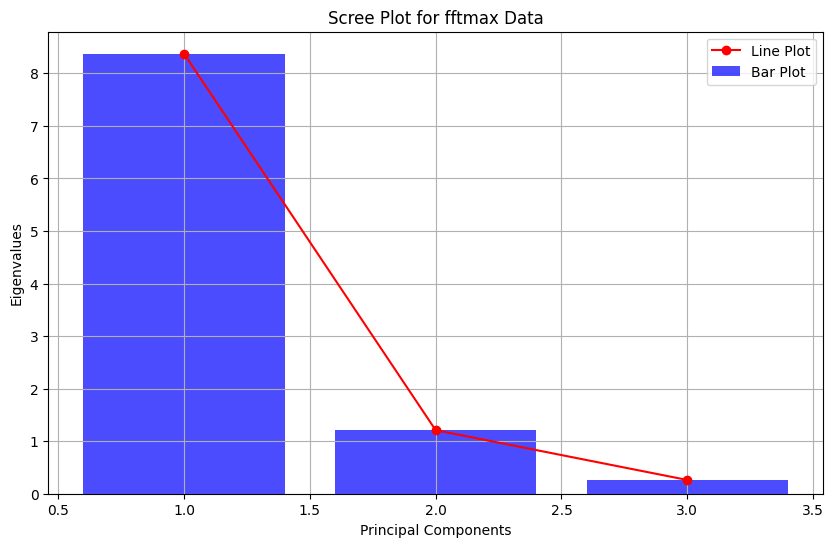

In [23]:
plt.figure(figsize=(10, 6))

plt.bar(range(1, len(pca_fftmax.explained_variance_) + 1), pca_fftmax.explained_variance_, color='blue', alpha=0.7, label='Bar Plot')
plt.plot(range(1, len(pca_fftmax.explained_variance_) + 1), pca_fftmax.explained_variance_, marker='o', color='red', label='Line Plot')

plt.xlabel('Principal Components')
plt.ylabel('Eigenvalues')
plt.title('Scree Plot for fftmax Data')
plt.legend()
plt.grid(True)
plt.show()

**Biplot**

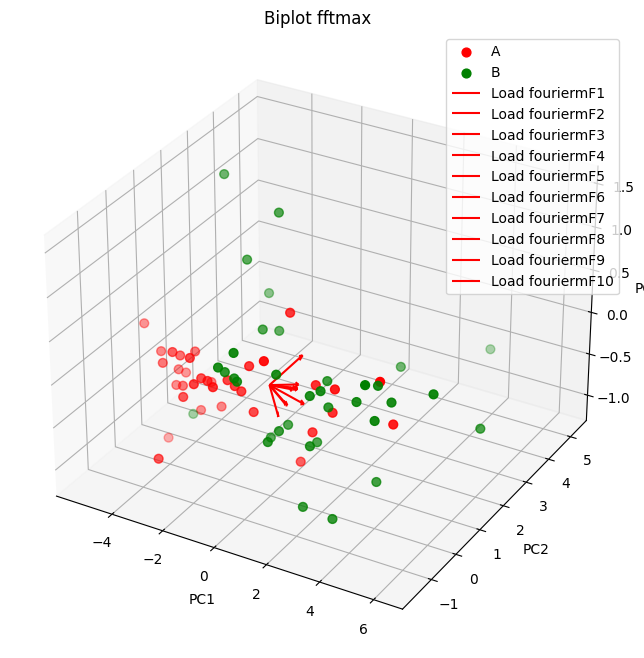

In [24]:
# Mendapatkan loading plot untuk fftmax
loading_scores_fftmax = pca_fftmax.components_[:3, :].T * np.sqrt(pca_fftmax.explained_variance_[:3])

# Mendapatkan score plot untuk fftmax
score_plot_df_fftmax = pd.DataFrame(data=pca_result_fftmax[:, :3], columns=['Principal Component 1', 'Principal Component 2', 'Principal Component 3'])
score_plot_df_fftmax['Zat'] = fftmax_data['Zat']

# Plot biplot untuk fftmax menggunakan Matplotlib
fig_fftmax = plt.figure(figsize=(10, 8))
ax_fftmax = fig_fftmax.add_subplot(111, projection='3d')

# Plot score plot untuk fftmax
for zat, color in zip(score_plot_df_fftmax['Zat'].unique(), ['r', 'g', 'b']):
    indices = score_plot_df_fftmax['Zat'] == zat
    ax_fftmax.scatter(score_plot_df_fftmax.loc[indices, 'Principal Component 1'],
                     score_plot_df_fftmax.loc[indices, 'Principal Component 2'],
                     score_plot_df_fftmax.loc[indices, 'Principal Component 3'],
                     c=color, s=40, label=zat)

# Tambahkan loading plot untuk fftmax
for i, feature in enumerate(fftmax_features.columns):
    ax_fftmax.quiver(0, 0, 0, loading_scores_fftmax[i, 0], loading_scores_fftmax[i, 1], loading_scores_fftmax[i, 2],
                     color='red', arrow_length_ratio=0.1, label=f'Load {feature}')

# Atur label sumbu dan rotasi untuk fftmax
ax_fftmax.set_xlabel('PC1')
ax_fftmax.set_ylabel('PC2')
ax_fftmax.set_zlabel('PC3')

# Tampilkan legenda untuk fftmax
ax_fftmax.legend()

plt.title('Biplot fftmax')
plt.show()

##Dari hasil di atas dapatkah PCA digunakan untuk mengurangi dimensi data tersebut? Bagaimana jika data sangat nonlinier?

Dapatkah PCA digunakan untuk mengurangi dimensi data tersebut?

iya bisa, PCA dapat digunakan untuk mengurangi dimensi data pada kedua dataset gradmax dan fftmax. PCA bekerja dengan mengekstraksi komponen utama yang paling signifikan dalam data, yang merupakan kombinasi linear dari fitur asli. Dengan menggunakan komponen utama ini, kita dapat merepresentasikan data dalam dimensi yang lebih rendah, sambil mempertahankan sebagian besar variasi dari data asli.

Bagaimana jika data sangat nonlinier?

PCA kurang efektif untuk data yang sangat nonlinier karena PCA berasumsi bahwa hubungan antara fitur-fitur dalam data adalah linear. Jika data memiliki hubungan nonlinier yang kompleks, PCA mungkin tidak dapat menangkap struktur tersebut secara optimal. Untuk data yang sangat nonlinier, teknik reduksi dimensi nonlinier seperti t-SNE atau UMAP dapat menjadi pilihan yang lebih baik.

## Dari hasil di atas gunakan PCA untuk mengurangi dimensi data dengan rasio varians yang dijelaskan sebesar 95%.

In [25]:
def perform_pca(data, name):
    # Mengambil fitur dari dataset
    features = data.drop("Zat", axis=1)

    # Normalisasi fitur menggunakan StandardScaler
    scaler = StandardScaler()
    features_normalized = scaler.fit_transform(features)

    # Membuat objek PCA dan melakukan reduksi dimensi
    pca = PCA()
    pca_result = pca.fit_transform(features_normalized)

    # Hitung rasio varians kumulatif
    cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

    # Temukan jumlah komponen untuk rasio varians ≥ 95%
    n_components_95 = np.argmax(cumulative_variance_ratio >= 0.95) + 1

    print(f"Jumlah komponen untuk rasio varians ≥ 95% pada {name}: {n_components_95}")

    # Menggunakan jumlah komponen untuk rasio varians ≥ 95%
    pca_95 = PCA(n_components=n_components_95)
    data_reduced_95 = pca_95.fit_transform(features_normalized)

    return pca, pca_result, cumulative_variance_ratio, n_components_95, data_reduced_95

# Membaca data
gradmax_data = pd.read_csv("gradmax.csv")
fftmax_data = pd.read_csv("fftmax.csv")

# Melakukan analisis PCA pada gradmax
pca_gradmax, pca_result_gradmax, cumulative_variance_ratio_gradmax, n_components_95_gradmax, gradmax_reduced_95 = perform_pca(gradmax_data, "gradmax")

# Melakukan analisis PCA pada fftmax
pca_fftmax, pca_result_fftmax, cumulative_variance_ratio_fftmax, n_components_95_fftmax, fftmax_reduced_95 = perform_pca(fftmax_data, "fftmax")

# Menampilkan hasil rasio varians kumulatif untuk kedua dataset
print("\nRasio Varians Kumulatif - gradmax:")
print(cumulative_variance_ratio_gradmax)
print("\nRasio Varians Kumulatif - fftmax:")
print(cumulative_variance_ratio_fftmax)

Jumlah komponen untuk rasio varians ≥ 95% pada gradmax: 3
Jumlah komponen untuk rasio varians ≥ 95% pada fftmax: 3

Rasio Varians Kumulatif - gradmax:
[0.8460038  0.93219399 0.97754685 0.98946222 0.99420036 0.99771461
 0.99872127 0.99942809 0.99980797 1.        ]

Rasio Varians Kumulatif - fftmax:
[0.82535121 0.94456887 0.97035202 0.98558029 0.99311452 0.99606355
 0.99812215 0.99912187 0.99990072 1.        ]


Analisis Hasil :
* Pada kedua dataset gradmax dan fftmax, jumlah komponen yang diperlukan untuk mempertahankan setidaknya 95% dari varians asli adalah 3.
* Pada kedua dataset, rasio variansi kumulatif mencapai lebih dari 99% dengan menggunakan 3 komponen utama. Ini menunjukkan bahwa komponen utama pertama sampai ketiga sudah memberikan kontribusi besar terhadap varians total.
* Dengan menggunakan 3 komponen utama, kita dapat melakukan analisis lebih lanjut atau visualisasi data dengan dimensi yang lebih rendah, tetapi tetap mempertahankan sebagian besar struktur dan variasi dalam data.